In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob as glob
import ruptures as rpt
from scipy.signal import butter,filtfilt
from scipy.misc import derivative
import scipy.integrate as sint
%matplotlib notebook

In [15]:

"""
Read all Mseries data into one big dataframe
Find the path to files in subfolders using os.listdir
"""
def read_M_series_subfolders(path):
    # create a list of file and sub directories 
    # names in the given directory 
    subfolders = os.listdir(path)
    file_list = []
    
    # Iterate over all the entries
    for names in subfolders:
        # Create full path
        fullPath = os.path.join(path, names)
        # If entry is a directory then get the list of files in this directory 
        temp_path = fullPath#for glob
        if os.path.isdir(fullPath):
            file_list = file_list + read_M_series_subfolders(fullPath)   
        else:
            txt_files = glob.glob(path + "/M*.txt")#only read txt files
            if (txt_files != []):
                file_list.append(txt_files)
    return file_list

"""
Function to read M_series data into pandas dataframe
"""
def read_Mseries_data(path):
    drifter_identifyer = path[85:-4]
    print(drifter_identifyer)
    column_names = ['time', 'pressure1', 'temp1', 'pressure2', 'temp2', 'acc_x', 'acc_y', 'acc_z', 'gyro_x',
                    'gyro_y', 'gyro_z', 'mag_x', 'mag_y', 'mag_z', 'High-g acc_x', 'High-g acc_y', 'High-g acc_z']
    indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    df = pd.read_csv(path, header = 0, names = column_names,usecols = indices)
    df.drop(df[abs(df.pressure1) > 3000].index, inplace = True)
    df.drop(df[abs(df.pressure2) > 3000].index, inplace = True)
    return df

def plot_and_slice(filename,start,stop):
    df = read_Mseries_data(filename)
    df.drop(df[abs(df.pressure1) > 3000].index, inplace = True)
    df.drop(df[abs(df.pressure2) > 3000].index, inplace = True)
    plt.plot(df.pressure1[start:stop])
    plt.plot(df.pressure2[start:stop])
    plt.grid()
    plt.show()

"""Concatonate all M_series files into one big fat dataframe"""
def Concatonate_M_Series(all_files):
    li = []
    for i in range(len(all_files)):
        for j in range(len(all_files[i])):
            if (i == 37 and j ==2):#there is a problem with reading this file
                break
            else:
                df = read_Mseries_data(all_files[i][j])
                li.append(df)
    full_dataset = pd.concat(li, axis=0, ignore_index=True)
    return full_dataset



In [16]:
"""read all filenames from folder system"""
path = "/Users/georgecowie/Documents/Master/Masteroppgave/data/Drifters/Supraglacial channel"#common path
filenames = np.array(read_M_series_subfolders(path),dtype=object)
filenames = np.unique(filenames)#remove duplicate files
#M_series_df = Concatonate_M_Series(filenames)



# Data processing M-Series
Here the data is cut so that periods where the drifters were lying still are cut from the data sets. This is done by manual inspection of the pressure data.

## Problematic files:

### 13072021
all files on 13072021/M13 look strange

Possibly got stuck during deployment: 13072021/M15/M150713150855

Very large negative pressure values on: 13072021/M16/M160713151126

Possibly stuck: 13072021/M16/M160713160519

Probably not deployed: 13072021/M16/M160101000000

Strange readings: 13072021/M17/M170713170339
probably stuck: 13072021/M17/M170713151049
probably stuck: 13072021/M17/M170713160406

Looks weird: 13072021/M18/M180713164623

Only one file with weird data all others are empty: 13072021/M19

All m20 files except : 13072021/M20/M200713151908 are weird

Only m21 usable file: 13072021/M21/M210713151106

No usable files 13072021/M22

### 15072021

Not usable: 15072021/M14/M140715161730

Drifter possibly ran out of battery in middle of run: 15072021/M16/M160715104407

Left and right pressure identical. 15072021/M17/M170715161755, 15072021/M17/M170715104318

No data 15072021/M19/M190715161925

Unusable: 15072021/M20/M200715104437

End of data might be missing: 15072021/M22/M220715104430

### 17072021

Unusable: 17072021/M02/M020101000000

Stuck: 17072021/M04/M040717135101

Incomplete data, probably stuck: 17072021/M07/M07-0717142806

Useless: 17072021/M10/M100717142709

Useless: 17072021/M10/M100717135525

weird drift, probably not deployed: 17072021/M23/M23-0715224431

probably not deployed: 17072021/M23/M23-0717073558

weird drift and big spikes: 17072021/M23/M23-0716213517

### 18072021

incomplete 18072021/M03/M030718173700

Not sure if it was deployed or not, missing endpoints 18072021/M03/M030101000000

Not deployed 18072021/M03/M030718145845

Not deployed 18072021/M03/M030718144901

Possibly stuck in beginning: 18072021/M04/M040718173701

Incomplete: 18072021/M07/M07-0718173651

Possibly usable, but weird: 18072021/M07/M07-0718144919


all files empty 18072021/M14

In [17]:
"""Manually go trough every file to remove time when drifters are logging but stationary"""
#
"""13072021/M13"""
"""plot_and_slice(filenames[0][0],0,-1)#all files on 13072021/M13 look strange
plot_and_slice(filenames[0][1],0,-1)
plot_and_slice(filenames[0][2],0,-1)
plot_and_slice(filenames[0][3],0,-1)
plot_and_slice(filenames[0][4],0,-1)
plot_and_slice(filenames[0][5],0,-1)
plot_and_slice(filenames[0][6],0,-1)"""

"""13072021/M14"""
"""plot_and_slice(filenames[1][0],49900,70500)
plot_and_slice(filenames[1][1],20500,40700)"""

"""13072021/M15"""
"""plot_and_slice(filenames[2][0],44000,79000)
plot_and_slice(filenames[2][1],44700,64300)"""


"""13072021/M16"""
"""#plot_and_slice(filenames[3][0],17500,20000)#strange pressure readings
plot_and_slice(filenames[3][1],56000,84000)
plot_and_slice(filenames[3][2],0,-1)"""

"""13072021/M17"""
"""plot_and_slice(filenames[4][0],22500,80300)#stuck
plot_and_slice(filenames[4][1],0,-1)#strange readings
plot_and_slice(filenames[4][2],98000,165000)#stuck"""

"""13072021/M18"""
"""plot_and_slice(filenames[5][0],61500,81000)
plot_and_slice(filenames[5][1],0,-1)#looks weird
plot_and_slice(filenames[5][2],25900,43500)"""

"""13072021/M19"""
#all m19 files look weird on this day
#plot_and_slice(filenames[6][0],0,-1)
#plot_and_slice(filenames[6][1],0,-1)
#plot_and_slice(filenames[6][2],0,-1)
#plot_and_slice(filenames[6][3],0,-1)
#plot_and_slice(filenames[6][4],0,-1)
#plot_and_slice(filenames[6][5],0,-1)
#plot_and_slice(filenames[6][6],0,-1)
#plot_and_slice(filenames[6][7],0,-1)
#plot_and_slice(filenames[6][8],0,-1)
#plot_and_slice(filenames[6][9],0,-1)

"""13072021/M20/M200713151908"""
"""plot_and_slice(filenames[7][0],5900,-1)
#plot_and_slice(filenames[7][1],0,-1)
#plot_and_slice(filenames[7][2],0,-1)
#plot_and_slice(filenames[7][3],0,-1)
#plot_and_slice(filenames[7][4],0,-1)
#plot_and_slice(filenames[7][5],0,-1)
#plot_and_slice(filenames[7][6],0,-1)
#plot_and_slice(filenames[8][0],0,-1)"""

"""13072021/M21"""
"""#plot_and_slice(filenames[8][0],0,-1)#not usable
plot_and_slice(filenames[8][1],32300,50000)
#plot_and_slice(filenames[8][2],0,-1)#not usable"""

"""13072021/M22"""
#plot_and_slice(filenames[9][0],0,-1)
#plot_and_slice(filenames[9][1],0,-1)
#plot_and_slice(filenames[9][2],0,-1)
#plot_and_slice(filenames[9][3],0,-1)
#plot_and_slice(filenames[9][4],0,-1)
#plot_and_slice(filenames[9][5],0,-1)

"""15072021/M09"""
"""plot_and_slice(filenames[10][0],49500,70500)
plot_and_slice(filenames[10][1],12900,32500)"""

"""15072021/M14"""
"""plot_and_slice(filenames[11][0],21700,41500)
#plot_and_slice(filenames[11][1],0,-1)#not usable"""


"""15072021/M15"""
"""plot_and_slice(filenames[12][0],18000,37500)
plot_and_slice(filenames[12][1],15900,36600)"""

"""15072021/M16"""
"""plot_and_slice(filenames[13][0],21400,41200)
plot_and_slice(filenames[13][1],14500,-1)#possibly ran out of battery"""



"""15072021/M17"""
"""plot_and_slice(filenames[14][0],22500,62600)#left and right pressure sensor are more or less identical
plot_and_slice(filenames[14][1],20000,106000)#left and right pressure sensor are more or less identical"""
#38
"""15072021/M18"""
"""plot_and_slice(filenames[15][0],22000,42000)
plot_and_slice(filenames[15][1],20500,56000)"""

"""15072021/M19"""
"""#plot_and_slice(filenames[16][0],0,-1)#no data
plot_and_slice(filenames[16][1],22600,41800)"""

"""15072021/M20"""
"""#plot_and_slice(filenames[17][0],0,-1)#unusable"""

"""15072021/M21"""
"""plot_and_slice(filenames[18][0],29900,48900)"""

"""15072021/M22"""
"""plot_and_slice(filenames[19][0],31400,-1)#part of data missing?"""

"""17072021/M02"""
"""#plot_and_slice(filenames[20][0],0,-1)#unsusable"""

"""17072021/M03"""
"""plot_and_slice(filenames[21][0],19500,37590)"""

"""17072021/M04"""
"""plot_and_slice(filenames[22][0],30400,52700)#stuck"""

"""17072021/M05"""
"""plot_and_slice(filenames[23][0],25950,44200)# P1 and P2 identical"""

"""17072021/M07"""
"""plot_and_slice(filenames[24][0],1070,4920)#incomplete dataset"""

"""17072021/M08"""
"""plot_and_slice(filenames[25][0],26650,45000)"""

"""17072021/M09"""
"""plot_and_slice(filenames[26][0],28700,46700)"""
"""17072021/M10"""
"""#plot_and_slice(filenames[27][0],0,-1)#ueseless/not deployed
#plot_and_slice(filenames[27][1],0,-1)#useless/strange readings"""

"""17072021/M23"""
"""#plot_and_slice(filenames[28][0],0,-1)#weir drift
#plot_and_slice(filenames[28][1],0,-1)#eird
#plot_and_slice(filenames[28][2],0,-1)#weird
plot_and_slice(filenames[28][3],33450,51750)"""

"""17072021/M24"""
"""plot_and_slice(filenames[29][0],34850,53000)"""

"""18072021/M03"""
"""plot_and_slice(filenames[30][0],25500,-1)#incomplete
plot_and_slice(filenames[30][1],0,-1)#not sure if deployed or not missing start and end probably stuck
#plot_and_slice(filenames[30][2],0,-1)#not deployed
#plot_and_slice(filenames[30][3],0,-1)not deployed"""

"""18072021/M04"""
"""plot_and_slice(filenames[31][0],26750,82300)#possibly stuck
plot_and_slice(filenames[31][1],15300,41000)"""

"""18072021/M07"""
"""plot_and_slice(filenames[32][0],28860,-1)#incomplete
#plot_and_slice(filenames[32][1],14750,-1)#possibly usable, but weird"""


#plot_and_slice(filenames[33][0],28700,61100)
#plot_and_slice(filenames[33][1],0,-1)


#plot_and_slice(filenames[34][0],0,-1)
#plot_and_slice(filenames[34][1],0,-1)
#plot_and_slice(filenames[34][2],0,-1)
#plot_and_slice(filenames[34][3],0,-1)

#plot_and_slice(filenames[35][0],0,-1)
#plot_and_slice(filenames[35][1],0,-1)

"""18072021/M14"""
"""#plot_and_slice(filenames[36][0],0,-1)
#plot_and_slice(filenames[36][1],0,-1)
#plot_and_slice(filenames[36][2],0,-1)
#plot_and_slice(filenames[36][3],0,-1)
#plot_and_slice(filenames[36][4],0,-1)
#plot_and_slice(filenames[36][5],0,-1)
#plot_and_slice(filenames[36][6],0,-1)
#plot_and_slice(filenames[36][7],0,-1)"""




#plot_and_slice(filenames[37][0],0,-1)
#plot_and_slice(filenames[37][1],0,-1)


#plot_and_slice(filenames[38][0],0,-1)
#plot_and_slice(filenames[38][1],0,-1)
#plot_and_slice(filenames[38][2],0,-1)

#plot_and_slice(filenames[39][0],0,-1)
#plot_and_slice(filenames[39][1],0,-1)
#plot_and_slice(filenames[39][2],0,-1)







'#plot_and_slice(filenames[36][0],0,-1)\n#plot_and_slice(filenames[36][1],0,-1)\n#plot_and_slice(filenames[36][2],0,-1)\n#plot_and_slice(filenames[36][3],0,-1)\n#plot_and_slice(filenames[36][4],0,-1)\n#plot_and_slice(filenames[36][5],0,-1)\n#plot_and_slice(filenames[36][6],0,-1)\n#plot_and_slice(filenames[36][7],0,-1)'

# Ruptures change point detection M-series

Create some data to test different CPD methods

In [64]:
# generate signal
#15.07 2021 A drone was used to follow drifter M09 at 12:59. Filneme for this deployment: M090715104232.txt

def gen_signal(filename):
    ruptures_df = read_Mseries_data(filename)
    ruptures_df_norm = read_Mseries_data(filename)

    ruptures_df_norm["acc_abs"] = np.sqrt(ruptures_df["acc_x"]**2 + ruptures_df["acc_y"]**2 + ruptures_df["acc_z"]**2)
    ruptures_df_norm = (ruptures_df_norm-ruptures_df_norm.min())/(ruptures_df_norm.max()-ruptures_df_norm.min())
    signal_norm = ruptures_df_norm[["pressure1","pressure2","acc_abs"]].to_numpy()

    ruptures_df["acc_abs"] = np.sqrt(ruptures_df["acc_x"]**2 + ruptures_df["acc_y"]**2 + ruptures_df["acc_z"]**2)
    signal = ruptures_df[["pressure1","pressure2","acc_x","acc_y","acc_z"]].to_numpy()
    
    ruptures_df_mean = ruptures_df.rolling(10).mean()
    signal_mean = ruptures_df_mean[["pressure1","pressure2","acc_abs","acc_x","acc_y","acc_z"]].to_numpy()
    
    
    
    #calculate velocity
    start = 0
    end = len(ruptures_df["acc_x"])
    time = time_array(start,end)
    
    v_x =sint.cumtrapz(ruptures_df["acc_x"], time) 
    v_y =sint.cumtrapz(ruptures_df["acc_y"], time) 
    v_z =sint.cumtrapz(ruptures_df["acc_z"], time) 
    v_tot = np.sqrt(v_x**2 + v_y**2 + v_z**2)
    
    #Send data through low pass filter
    low_pass_signal = ruptures_df[["pressure1","pressure2","acc_x","acc_y","acc_z"]].to_numpy()

    # Filter requirements.
    T = time[-1]         # Sample Period
    fs = 100.0       # sample rate, Hz
    cutoff = 3      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
    order = 2       # sin wave can be approx represented as quadratic
    n = int(T * fs) # total number of samples
    
    for i in range(signal.shape[1]):
        y = butter_lowpass_filter(low_pass_signal[:,i], cutoff, fs, order)
        low_pass_signal[:,i] = y
        
    sigma = signal.std()
    dim = 3
    
    return signal, low_pass_signal, v_tot

"""Function taken from somehere on the internett"""
#https://medium.com/analytics-vidhya/how-to-filter-noise-with-a-low-pass-filter-python-885223e5e9b7
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

"""Create a time array from M series indexes"""
def time_array(start,end):
    n = int((end-start)/7)
    time_s = np.linspace(0,end-start,end-start)/50#convert to seconds
    return time_s

"""find index of time in video of a given drifter deployment"""
def index_finder(cp_times,time_s,start_n):
    length = len(cp_times)
    indexes = np.zeros(length)
    for i in range(length):#find indexes in time_s of the features
        indexes[i] = (next(j for j, _ in enumerate(time_s) if np.isclose(_, cp_times[i], 0.001)))    
    indexes = indexes.astype(int) + start_n
    return indexes





In [65]:
M09_1507,M09_1507_low_pass,M09_1507_v = gen_signal(filenames[10][0])#deployment filmed by drone
M24_1707,M24_1707_low_pass,M24_1707_v = gen_signal(filenames[29][0])#deployment filmed by handheld camera
M23_1807,M23_1807_low_pass,M23_1807_v = gen_signal(filenames[37][1])#deploy,ent filmed by handheld camera

15072021/M09/M090715104232
15072021/M09/M090715104232
17072021/M24/M24-0717135616
17072021/M24/M24-0717135616
18072021/M23/M23-0718144836
18072021/M23/M23-0718144836


# Window-based change point detection
Promising withautoregressive model . Does not classify stuck in different bins
https://centre-borelli.github.io/ruptures-docs/user-guide/detection/window/

In [66]:
def window_cpd(signal,model,width,jump,dim,sigma):
    # change point detection
    model =   model#"ar"
    n = np.shape(signal)[0]
    algo = rpt.Window(model=model, width = width, jump = jump).fit(signal)
    my_bkps = algo.predict(pen=np.log(n) * dim *sigma ** 2)
    rpt.show.display(signal, my_bkps, figsize=(10, 6))
    plt.show()
    print("Number of changepoints: ",len(my_bkps))
    return my_bkps

## Plot deployment filmed by drone together with features found by visual inspection

<IPython.core.display.Javascript object>


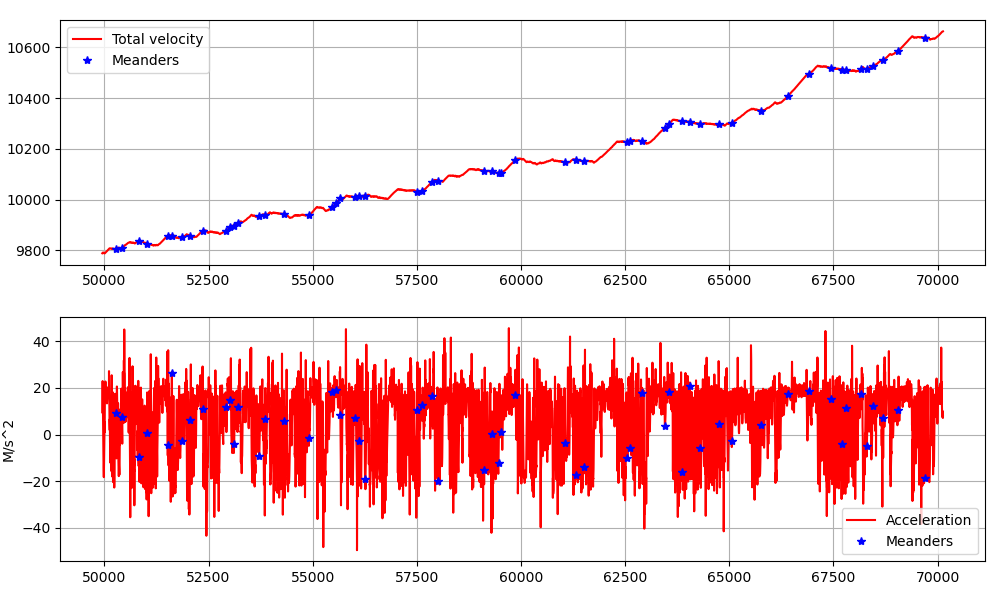

Number of changepoints:  143


In [67]:
start_n = 49949#49925#49770#49800
end_n = 70775#71700
time_s = time_array(start_n,end_n)
"""time of Changepoints found in drone video by visual inspection"""
vcp_drone = np.array([0,3,6,11,16,19,21,34,45,50,55,72,79,87,95,101,102,107,118,125,133,138,145,148,154,159,161,167,170,172,174,180,187,197,200,207,208,212,224,226,230,237,244,246,255,260,274,279,287,291,296,300,312,333,344,348,353,354,358,361,366,370,380,390,400,404])

"""time of meander bends found by visual inspection"""
vcp_meanders = np.array([3,6,14,18,28,30,35,39,45,56,58,60,62,72,75,84,96,107,109,111,118,120,123,148,150,155,158,180,184,187,188,195,219,224,228,249,250,256,267,269,275,279,284,293,299,313,326,336,347,352,354,361,364,367,372,379,392])


vcp_idx = index_finder(vcp_drone,time_s,start_n)#+170
vcp_meanders_idx = index_finder(vcp_meanders,time_s,start_n+170)
"""Plot the observed changepoints together with the calculated changepoints"""

#M09_1507_bkps = window_cpd(M09_1507[:,2],"ar",100,25,2,1)
M09_1507_bkps = window_cpd(M09_1507_low_pass,"ar",100,25,2,1)

#plt.plot(vcp_idx,np.zeros(len(vcp_idx)),marker = "^", color = "y",label = "Geometric features",ls = "None")

plt.plot(vcp_meanders_idx,np.ones(len(vcp_meanders_idx))*M09_1507_low_pass[vcp_meanders_idx,2],marker = "o", color = "b",label = "Geometric features",ls = "None")

plt.legend()
plt.show()



<IPython.core.display.Javascript object>


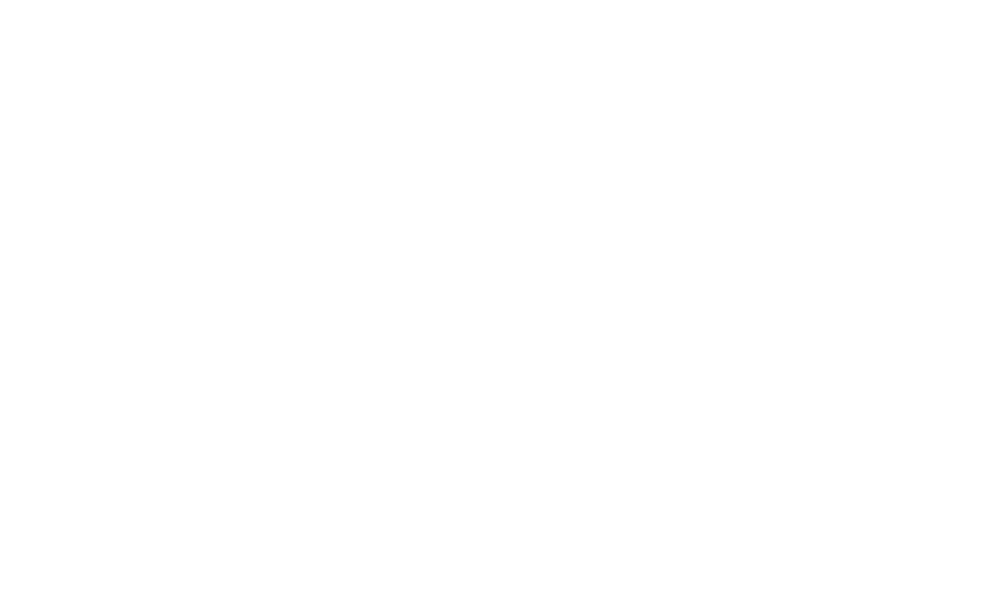

Number of changepoints:  85


In [68]:
"""M24 1707"""
start_M24_1707 = 34919
end_M24_1707 = 52919

time_M24_1707 = time_array(start_M24_1707,end_M24_1707)


M24_1707_vcp = np.array([0,2,9,11,13,15,17,19,21,23,26,28,36,40,41,44,51,59,65,74,77,78,85,88,90,94,97,99,105,111,116,123,124,128,136,138,145,146,151,156,160,162,172,176,179,182,184,188,192,197,199,204,213,218,219,225,226,227,231,239,242,248,262,263,267,279,281,297,308,316,329,332,343,359])
M24_1707_meanders = np.array([3,7,16,18,24,29,49,50,60,64,84,88,95,96,99,105,107,129,133,135,150,160,193,196,197,203,223,226,228,249,255,263,266,293,297,302,312,316,319,323,328,330,])

M24_1707_vcp_idx = index_finder(M24_1707_vcp,time_M24_1707,start_M24_1707)
M24_1707_meanders_idx = index_finder(M24_1707_meanders,time_M24_1707,start_M24_1707)


M24_1707_bkps = window_cpd(M24_1707[:,[0,1]],"ar",100,10,2,1)
plt.plot(M24_1707_vcp_idx,np.ones(len(M24_1707_vcp_idx)),marker = "^", color = "y", label = "Hydrologic features",ls = "None")
plt.plot(M24_1707_meanders_idx,np.zeros(len(M24_1707_meanders_idx)),marker = "o", color = "b",label = "Geometric features",ls = "None")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


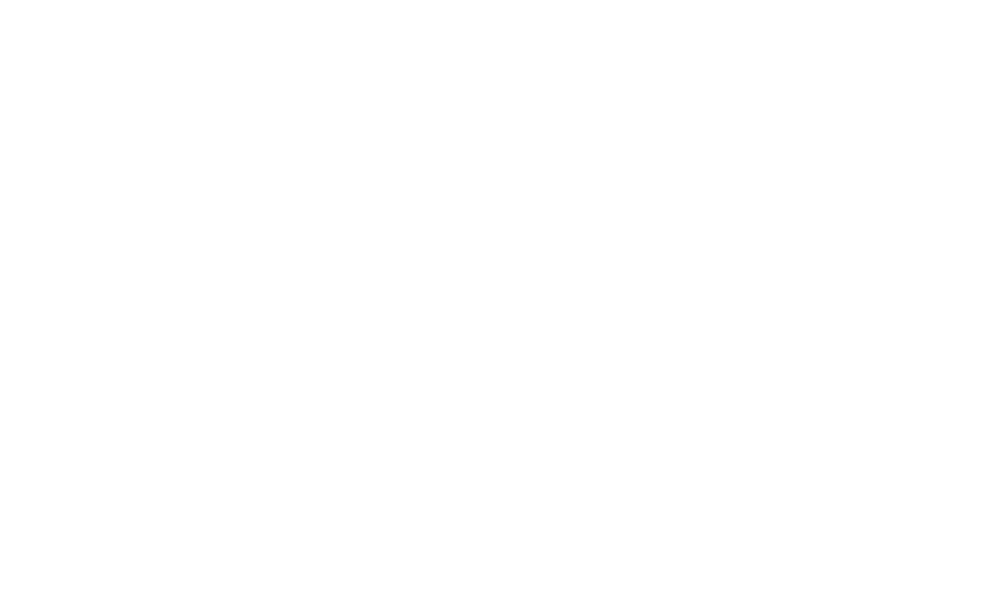

Number of changepoints:  9


In [69]:
"""M23_1807"""
start_M23_1807 = 26929
end_M23_1807 = 52300

time_M23_1807 = time_array(start_M23_1807,end_M23_1807)

M23_1807_vcp = np.array([0,11,18,24,35,37,54,67,78,99,110,114,124,128,131,135,146,150,154,160,167,179,183,197,200,213,222,224,235,247,251,260,266,274,282,292,294,295,296,300,317,318,327,330,335,346,348,352,369,376,382,395,420,433,448,461,465,503])
M23_1807_meanders = np.array([8,17,21,25,31,32,39,62,65,66,83,87,113,123,130,142,145,154,156,172,176,202,203,209,212,217,221,223,224,243,285,292,299,321,325,329,333,344,347,355,360,375,381,396,404,439,442,445,448,452,455,459,461,479])


M23_1807_vcp_idx = index_finder(M23_1807_vcp,time_M23_1807,start_M23_1807)
M23_1807_meanders_idx = index_finder(M23_1807_meanders,time_M23_1807,start_M23_1807)

M23_1807_bkps = window_cpd(M23_1807[:,[2]],"ar",100,10,2,1)
plt.plot(M23_1807_vcp_idx,np.ones(len(M23_1807_vcp_idx)),marker = "^", color = "y", label = "Hydrologic features",ls = "None")
plt.plot(M23_1807_meanders_idx,np.zeros(len(M23_1807_meanders_idx)),marker = "o", color = "b",label = "Geometric features",ls = "None")
plt.legend()
plt.show()

# Plot velocity and meanders

dx =  0.01


<IPython.core.display.Javascript object>


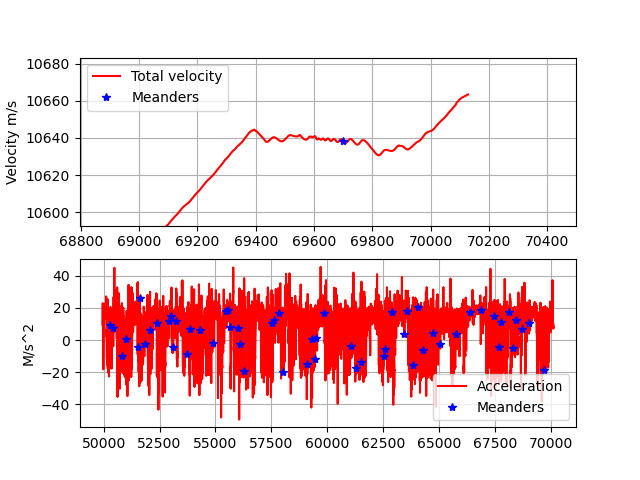

In [72]:
#plot total velocity together with manually registered meanders
def plot_velocity_meanders(meanders,hydraulic_features,tot_vel,offset):
    plt.close()
    time_s = np.linspace(hydraulic_features[0],hydraulic_features[-1],abs(hydraulic_features[0]-hydraulic_features[-1]))
    v_0 = 0#tot_vel[hydraulic_features[0]] #start velocity set to 0 where the drifter is deployed
    tot_vel = tot_vel - v_0
    plt.close()
    
    dx = 0.01
    acc = np.diff(tot_vel)/dx
    print("dx = ",dx)
    ax1 = plt.subplot(211)
    ax1.plot(time_s,tot_vel[hydraulic_features[0]:hydraulic_features[-1]],label = "Total velocity",color = "r")
    ax1.plot(meanders,np.ones(len(meanders))*tot_vel[meanders],marker = "*", color = "b", label = "Meanders",ls = "None")
    #ax1.plot(time_s,np.zeros(len(time_s)))
    plt.ylabel("Velocity m/s")
    plt.legend()
    plt.grid()

    ax2 = plt.subplot(212)
    ax2.plot(time_s,acc[hydraulic_features[0]:hydraulic_features[-1]],label = "Acceleration",color = "r")
    ax2.plot(meanders,np.ones(len(meanders))*acc[meanders],marker = "*", color = "b", label = "Meanders",ls = "None")
    plt.legend()
    plt.ylabel("M/s^2")
    plt.grid()
    plt.show()





plot_velocity_meanders(vcp_meanders_idx,vcp_idx,M09_1507_v,0)
#plot_velocity_meanders(M24_1707_meanders_idx,M24_1707_vcp_idx,M24_1707_v,0)
#plot_velocity_meanders(M23_1807_meanders_idx,M23_1807_vcp_idx,M23_1807_1507_v,0)


## Kernel CPD

https://centre-borelli.github.io/ruptures-docs/examples/kernel-cpd-performance-comparison/

In [71]:
def kernel_cpd(signal,kernel,min_size,penalty):
    algo_c = rpt.KernelCPD(kernel=kernel, min_size=500).fit(signal)  # written in C, same class as before
    result = algo_c.predict(pen=penalty)
    fig, ax_array = rpt.display(signal, result)

kernel = "linear"
dummy = kernel_cpd(signal[:,[0,1]],kernel,100,1000)

NameError: name 'signal' is not defined

## Binseg
https://centre-borelli.github.io/ruptures-docs/user-guide/detection/binseg/

Much faster than kernel

In [ ]:

def BinSeg(signal,model,jump,dim,sigma):
    # change point detection

    algo = rpt.Binseg(model=model, jump=jump).fit(signal)
    my_bkps = algo.predict(pen=np.log(n) * 1 * sigma ** 2)

    # show results
    rpt.show.display(signal, my_bkps, figsize=(10, 6))
    plt.show()
    
model = "ar"# "l1", "rbf", "linear", "normal", "ar"
sigma = 2

dummy = BinSeg(signal,model,100,3,sigma)

# BottomUp

Looks pretty much the same as binseng
https://centre-borelli.github.io/ruptures-docs/user-guide/detection/bottomup/

In [ ]:
def BottomUp(signal,model,jump,dim,sigma):
    # change point detection
    algo = rpt.BottomUp(model=model, jump=jump).fit(signal)
    my_bkps = algo.predict(pen=np.log(n) * dim * sigma ** 2)

    # show results
    rpt.show.display(signal, my_bkps, figsize=(10, 6))
    plt.show()
    return my_bkps

model = "l2"#"l2"  # "l1", "rbf", "linear", "normal", "ar"
sigma = 2

dummy = BottomUp(signal,model,1000,3,sigma)
